In [45]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

file_path_risoe = 'Data/Risoe/risoe_m_all.nc'
file_paths_borglum = 'Data/Borglum/borglum_all.nc'

signals_risoe = ['ws77', 'wd77', 'ws125', 'wd125']
signals_borglum = ['ws32', 'wd32']

# Get the Risoe dataset:
dataset = nc.Dataset(file_path_risoe, 'r')

list = []
for var_name in dataset.variables:
    list.append(var_name)
print(list)

time_minutes = np.array(dataset.variables['time'])
base_date_risoe = datetime(1995, 11, 20, 16, 25, 0)

# Convert time values to timestamp strings
time = []
for minutes in time_minutes:
	time_delta = timedelta(minutes=int(minutes))
	timestamp = base_date_risoe + time_delta
	time.append(timestamp.strftime('%Y-%m-%d %H:%M:%S'))

print(f"time:\n {time[:10]} - {time[-1]}")

for signal in signals_risoe:
	values = np.array(dataset.variables[signal])
	print(f'{signal}:\n {values[:10]} - {values[-10:-1]}')



df = pd.DataFrame(columns=list)
for var_name in dataset.variables:
    df[var_name] = dataset[var_name][:]


['time', 'ws44', 'ws44_qc', 'ws77', 'ws77_qc', 'ws125', 'ws125_qc', 'wd77', 'wd77_qc', 'wd125', 'wd125_qc', 't003', 't003_qc', 't044', 't044_qc', 't118', 't118_qc', 'td01', 'td01_qc', 'rain', 'rain_qc', 'press', 'press_qc', 'rhum', 'rhum_qc', 'grad', 'grad_qc']
time:
 ['1995-11-20 16:25:00', '1995-11-20 16:35:00', '1995-11-20 16:45:00', '1995-11-20 16:55:00', '1995-11-20 17:05:00', '1995-11-20 17:15:00', '1995-11-20 17:25:00', '1995-11-20 17:35:00', '1995-11-20 17:45:00', '1995-11-20 17:55:00'] - 2007-12-31 23:56:00
ws77:
 [3.36 3.05 3.59 3.87 4.74 4.91 4.98 5.39 5.76 5.52] - [8.14 8.71 6.82 7.26 7.24 6.04 6.97 8.17 6.66]
wd77:
 [205. 205. 204. 202. 201. 206. 203. 203. 193. 200.] - [0. 0. 0. 0. 0. 0. 0. 0. 0.]
ws125:
 [3.04 3.17 3.64 3.77 4.28 4.91 5.35 5.58 5.75 5.38] - [nan nan nan nan nan nan nan nan nan]
wd125:
 [208. 214. 209. 209. 212. 213. 210. 206. 207. 205.] - [0. 0. 0. 0. 0. 0. 0. 0. 0.]


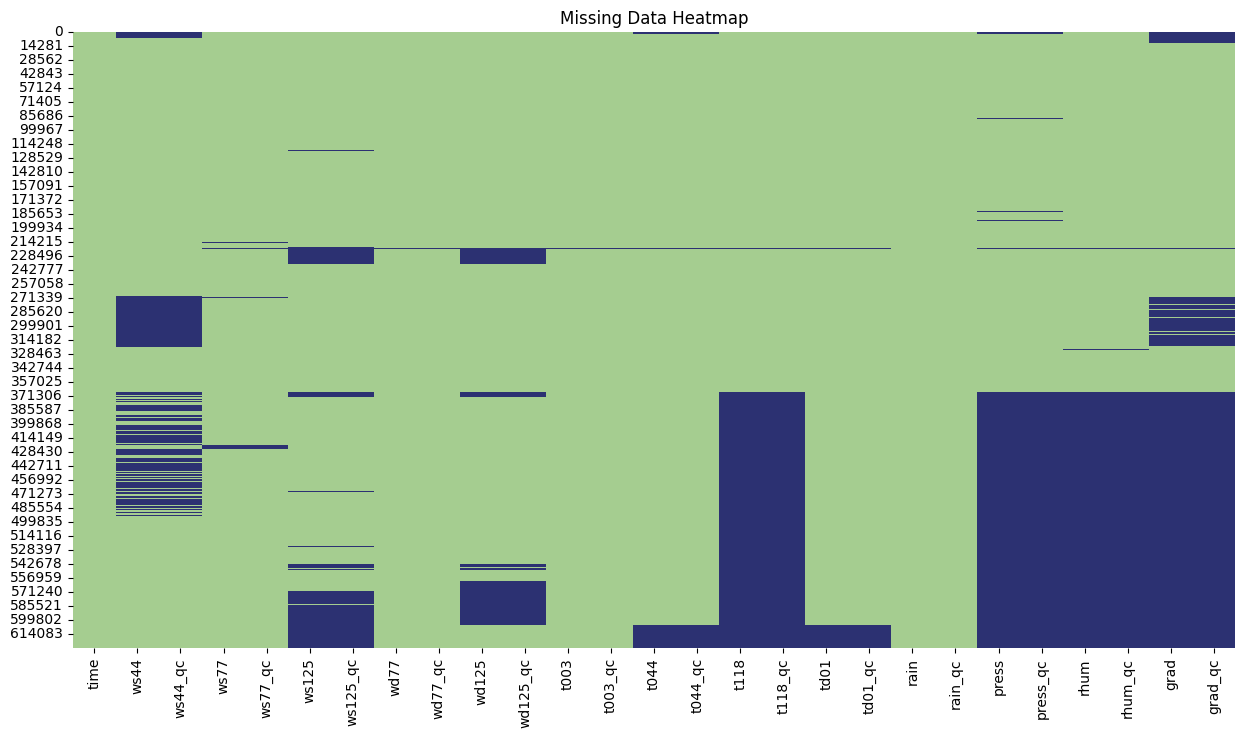

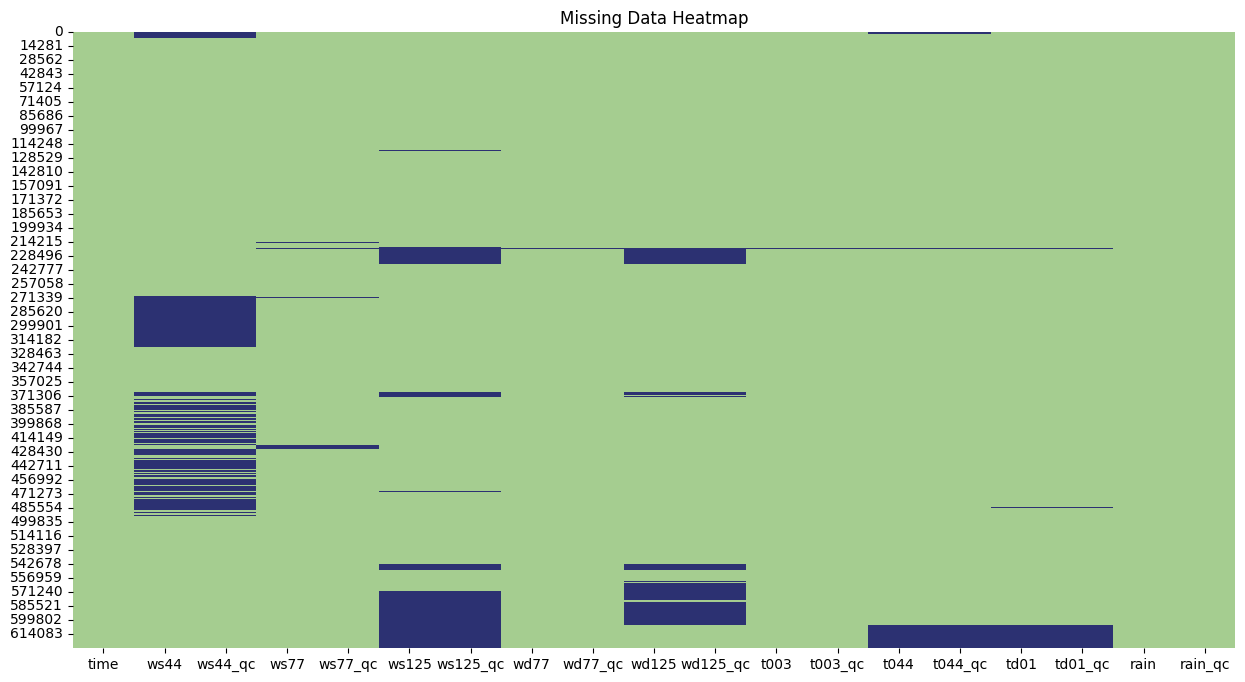

In [46]:
# Show heatmap of missing values
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='crest')
plt.title('Missing Data Heatmap')
plt.show()

relevant = df.drop(columns=['t118', 't118_qc', 'press', 'press_qc', 'rhum', 'rhum_qc', 'grad', 'grad_qc'])

# Show heatmap of missing values
plt.figure(figsize=(15, 8))
sns.heatmap(relevant.isnull(), cbar=False, cmap='crest')
plt.title('Missing Data Heatmap')
plt.show()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'ws44'),
  Text(1, 0, 'ws44_qc'),
  Text(2, 0, 'ws77'),
  Text(3, 0, 'ws77_qc'),
  Text(4, 0, 'ws125'),
  Text(5, 0, 'ws125_qc'),
  Text(6, 0, 'wd77'),
  Text(7, 0, 'wd77_qc'),
  Text(8, 0, 'wd125'),
  Text(9, 0, 'wd125_qc'),
  Text(10, 0, 't003'),
  Text(11, 0, 't003_qc'),
  Text(12, 0, 't044'),
  Text(13, 0, 't044_qc'),
  Text(14, 0, 'td01'),
  Text(15, 0, 'td01_qc'),
  Text(16, 0, 'rain'),
  Text(17, 0, 'rain_qc')])

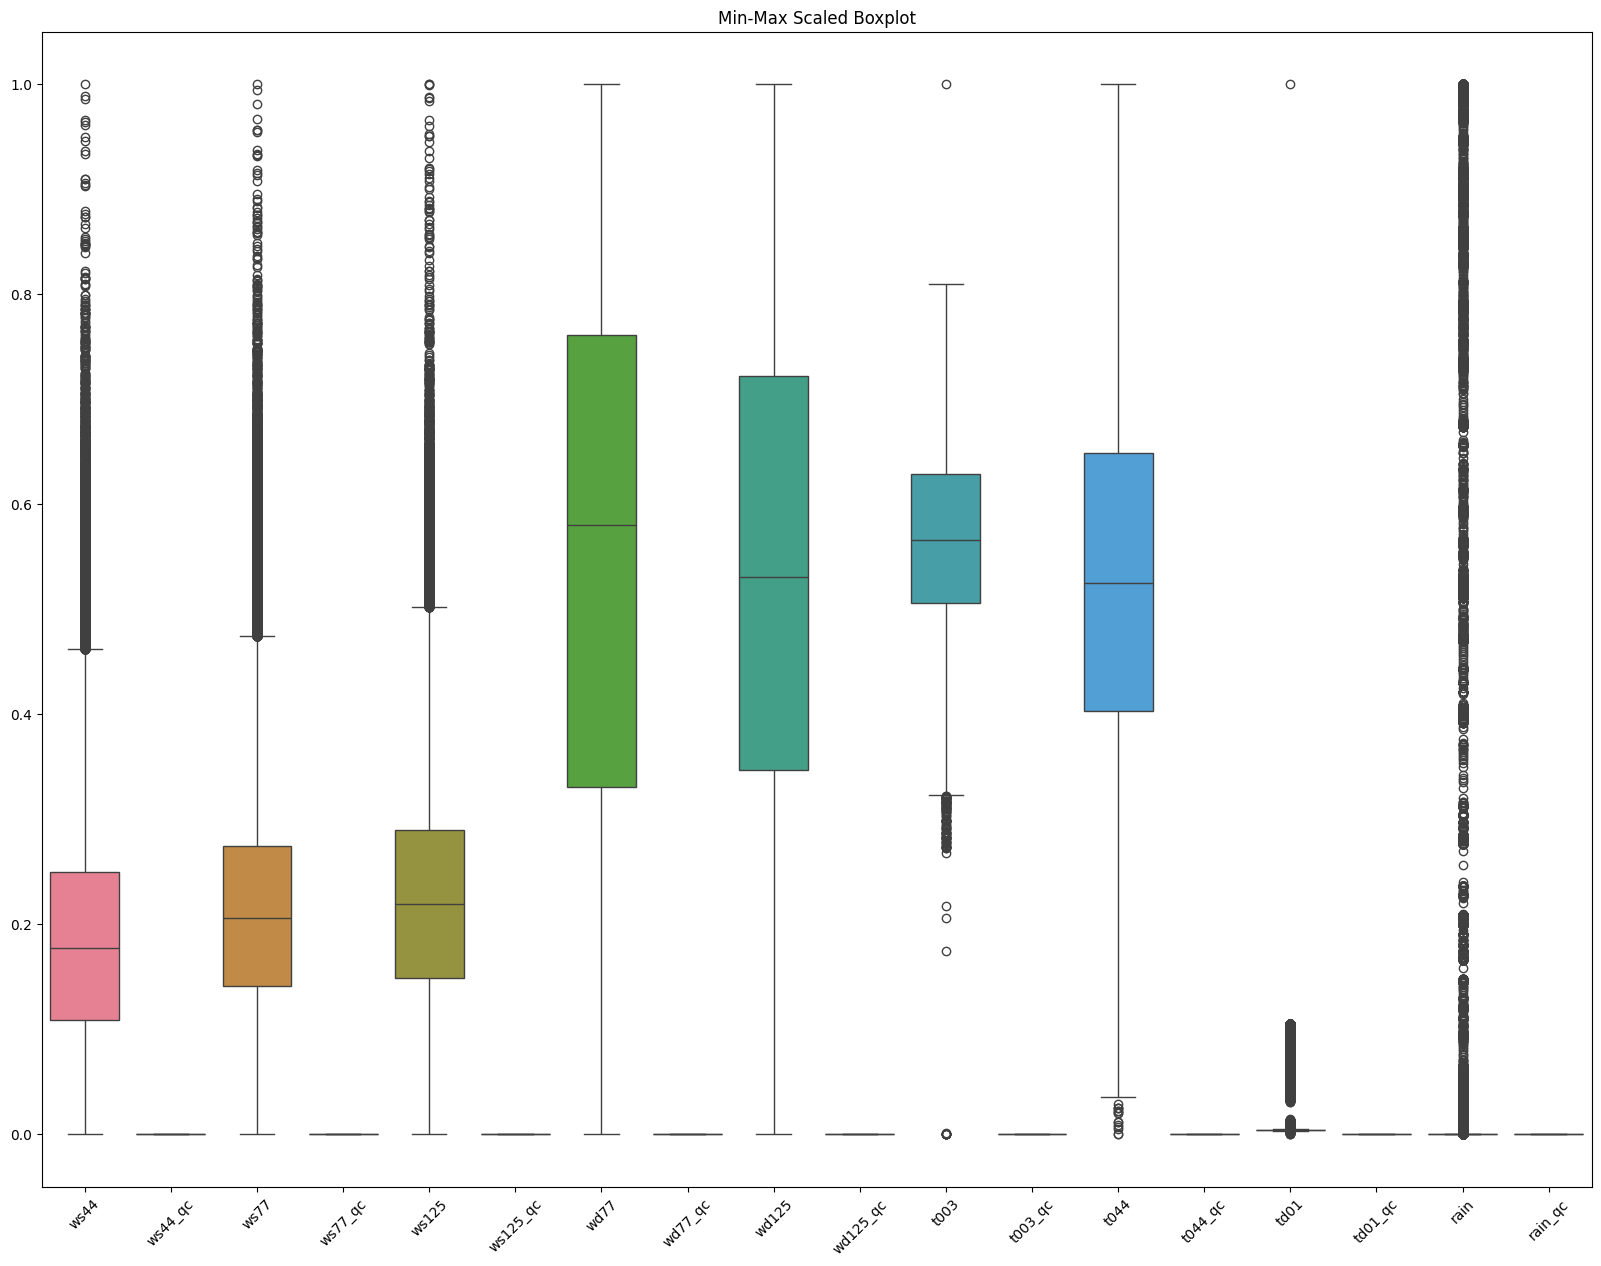

In [50]:
numeric_columns = relevant.drop(columns=['time']).select_dtypes(include=['number'])
min_max_scaler = MinMaxScaler()

# Transform data
min_max = min_max_scaler.fit_transform(numeric_columns)

min_max_df = pd.DataFrame(min_max, columns=numeric_columns.columns)

plt.figure(figsize=(20, 15))
sns.boxplot(data=min_max_df)
plt.title('Min-Max Scaled Boxplot')
plt.xticks(rotation=45)

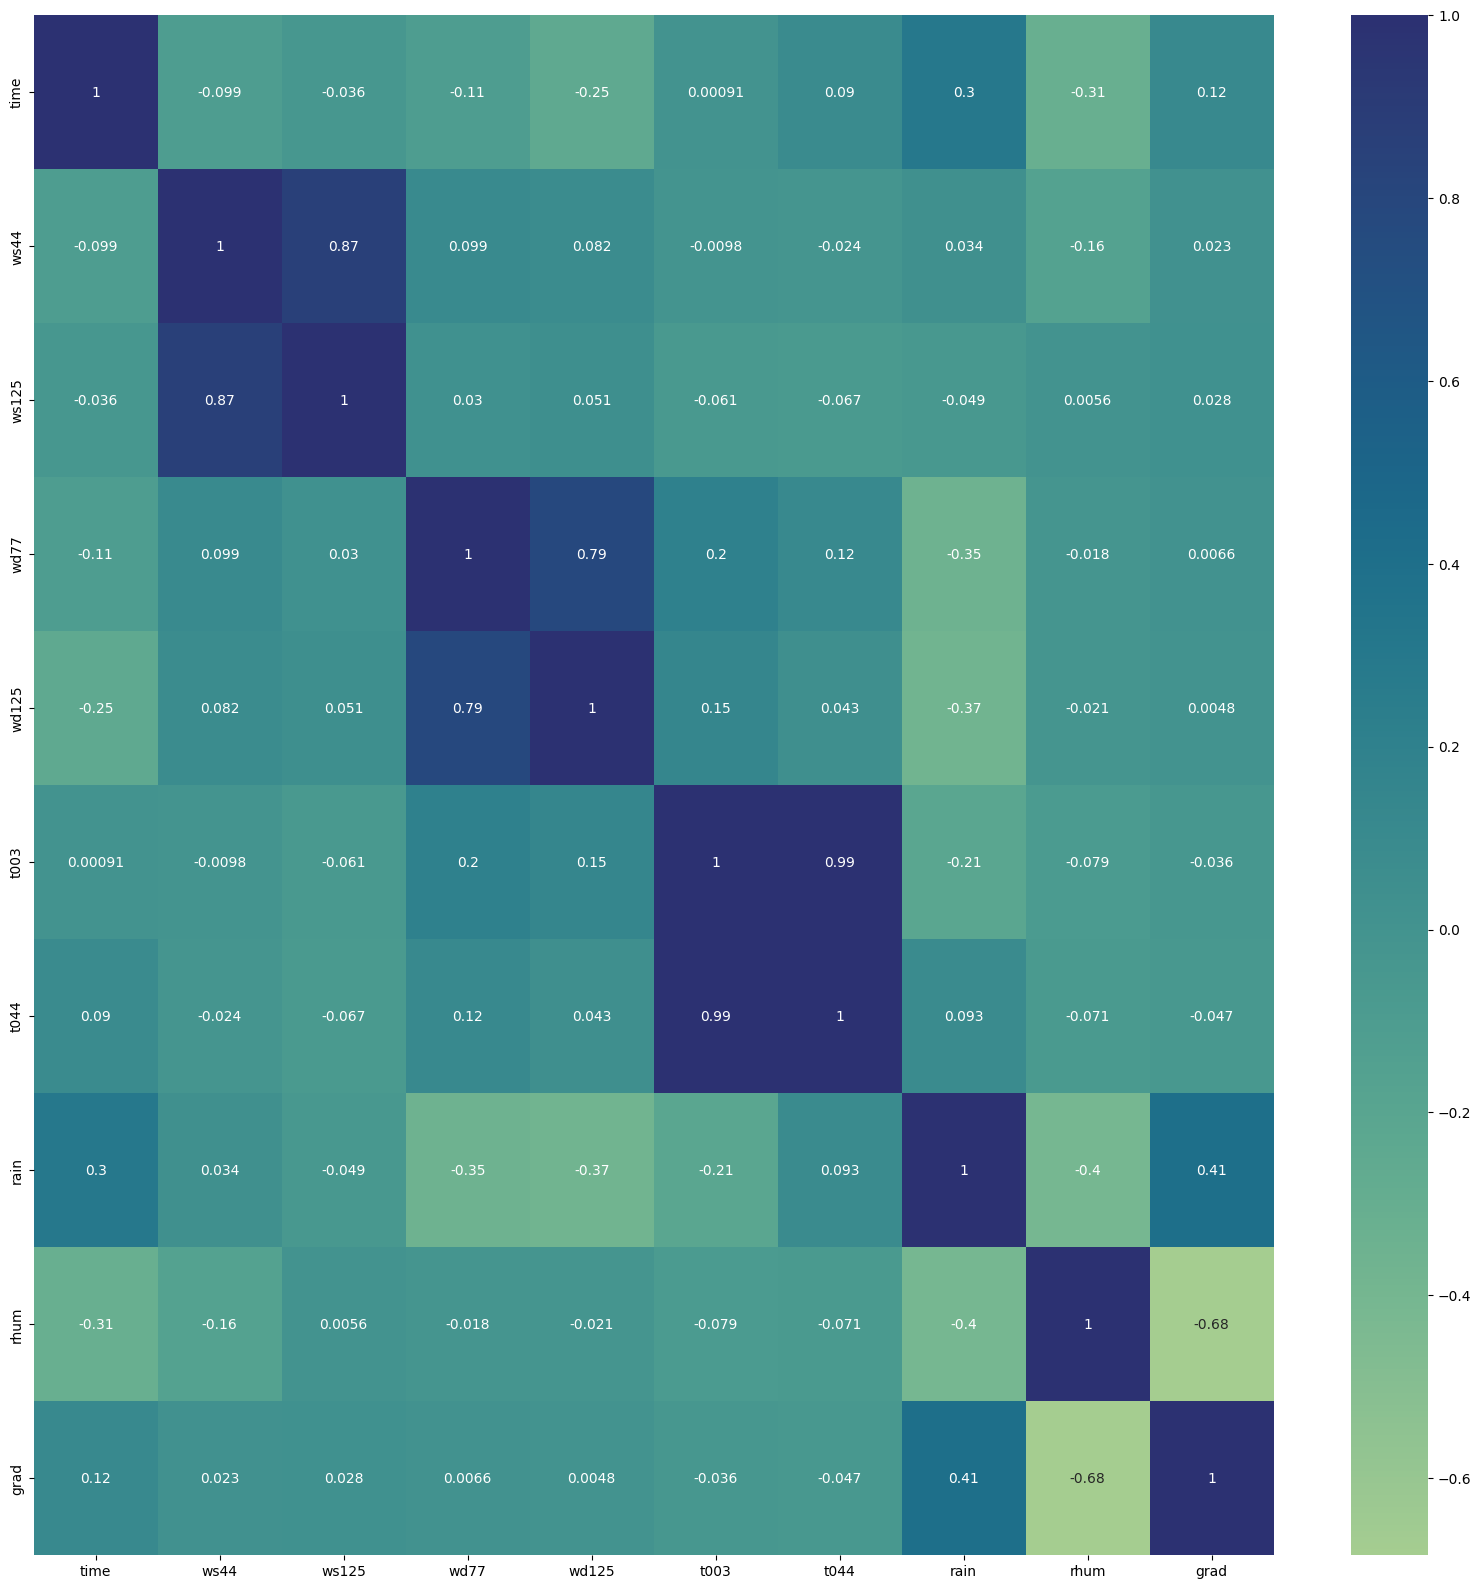

In [53]:
#drop all qc columns as they are empty (having 0 or nan)
df = df.drop(columns=['ws44_qc','ws77_qc','ws125_qc','wd77_qc','wd125_qc','t003_qc','t044_qc','t118_qc','td01_qc','rain_qc','press_qc','rhum_qc','grad_qc'])
corr = df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='crest')
plt.show()

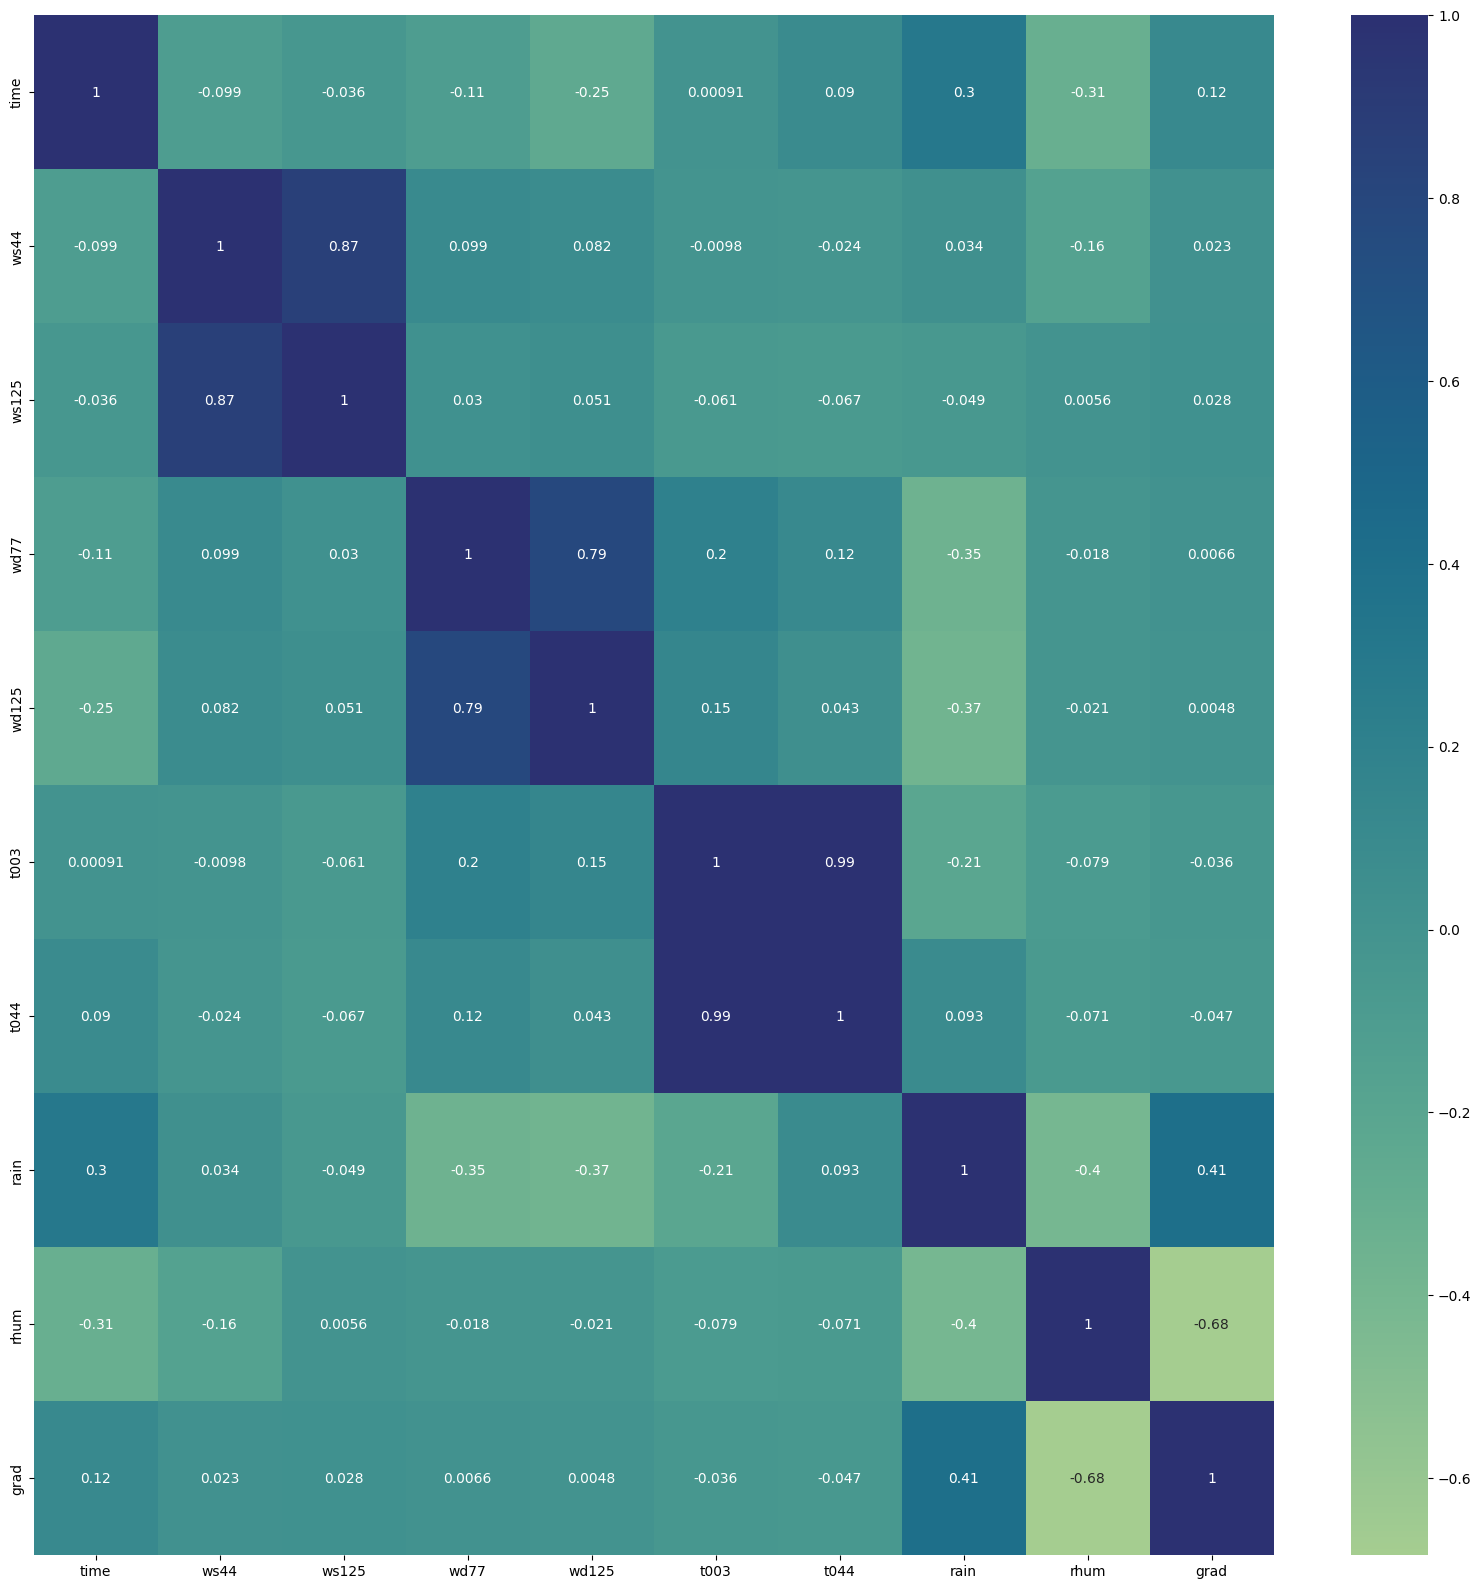

In [55]:
df = df.drop(columns=['press', 'ws77', 'td01', 't118', 't044'])
corr = df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='crest')
plt.show()